In [1]:
import sys, os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import skmob as skm
# as jupyter notebook cannot find __file__, import module and submodule path via current_folder
current_folder = globals()['_dh'][0]

PROJECT_SRC_PATH = os.path.realpath(os.path.join(current_folder, '..', '..', 'xml4uf'))
sys.path.append(PROJECT_SRC_PATH)

from ufo_map.Utils.helpers import *

In [2]:
df = pd.read_csv('/Users/Felix/Documents/Studium/PhD/05_Projects/03_Understand_Urban_Form_on_Mobility/03_Program/data/tripdata/waypoints/waypoints_100k.csv')
df.head(3)

,Unnamed: 0,Unnamed: 0.1,TripID,WaypointSequence,CaptureDate,lat,lon,SegmentID,ZoneName,Frc,DeviceID,RawSpeed,RawSpeedMetric,lon_proj,lat_proj,OSM_edge_1,OSM_edge_2
0,0,939,0864364a093e5c9d8b534bc3da3c1f58,0,2017-03-27T18:09:15.253Z,52.351000,13.099400,NaN,NaN,NaN,84bf44fb441a49031f0ab0ffa4de5f64,NaN,kph,370551.720553,5.801779e+06,232588936,232588923
1,1,940,0864364a093e5c9d8b534bc3da3c1f58,1,2017-03-27T18:12:17.427Z,52.355463,13.117613,NaN,NaN,NaN,84bf44fb441a49031f0ab0ffa4de5f64,NaN,kph,371805.019294,5.802243e+06,241639517,241642425
2,2,1092,0a95ff01129a456b19620b75e5329d6b,42,2017-03-27T16:02:37.000Z,52.325111,13.103566,NaN,NaN,NaN,264052c66423c0367645d09c35c91710,127.0,kph,370759.967762,5.798892e+06,275243986,290706780


In [14]:
# find trip with most entries
df['TripID'].value_counts()

ae77cdf71c348211b58fbc424b51e7b3    3040
1e0485953c276ebbfeba93a7c9a02675     823
27218f77835c0f4f3bb3656207e39a77     651
7aaab13ed527f631dd6f00b6a4239a4d     464
fb6efd238c14ce5f2d7017939bef6929     454
                                    ... 
c65afc662b3627a6b52db650c13124b2       1
d75909b906260ac7280a035d18c1a78b       1
d4c9dbaa1e36b442f0e7f5e421304401       1
dd9227950a8e0c863e1e19ae347cae47       1
46db66aed571bbd0ef28c3a6030b342f       1
Name: TripID, Length: 14719, dtype: int64

In [15]:
# analyse trip
df[df.TripID == 'ae77cdf71c348211b58fbc424b51e7b3']

,Unnamed: 0,Unnamed: 0.1,TripID,WaypointSequence,CaptureDate,lat,lon,SegmentID,ZoneName,Frc,DeviceID,RawSpeed,RawSpeedMetric,lon_proj,lat_proj,OSM_edge_1,OSM_edge_2
37954,37954,6058214,ae77cdf71c348211b58fbc424b51e7b3,468,2017-07-09T16:56:28.000Z,52.39520,13.13415,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,70.0,kph,373045.129757,5.806633e+06,30570808,30570816
37955,37955,6058215,ae77cdf71c348211b58fbc424b51e7b3,469,2017-07-09T16:56:29.000Z,52.39514,13.13386,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,69.0,kph,373025.227310,5.806627e+06,30570808,30570816
37956,37956,6058216,ae77cdf71c348211b58fbc424b51e7b3,470,2017-07-09T16:56:30.000Z,52.39510,13.13357,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,69.0,kph,373005.382234,5.806623e+06,30570808,30570816
37957,37957,6058217,ae77cdf71c348211b58fbc424b51e7b3,471,2017-07-09T16:56:31.000Z,52.39505,13.13329,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,70.0,kph,372986.188761,5.806618e+06,30570808,30570816
37958,37958,6058218,ae77cdf71c348211b58fbc424b51e7b3,472,2017-07-09T16:56:32.000Z,52.39502,13.13303,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,68.0,kph,372968.413396,5.806615e+06,30570808,30570816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76289,76289,6061249,ae77cdf71c348211b58fbc424b51e7b3,3503,2017-07-09T17:47:06.000Z,52.41433,13.07735,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,6.0,kph,369237.336287,5.808862e+06,1330165911,87175034
76290,76290,6061250,ae77cdf71c348211b58fbc424b51e7b3,3504,2017-07-09T17:47:07.000Z,52.41435,13.07733,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,6.0,kph,369236.035354,5.808864e+06,1330165911,87175034
76291,76291,6061251,ae77cdf71c348211b58fbc424b51e7b3,3505,2017-07-09T17:47:08.000Z,52.41436,13.07731,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,5.0,kph,369234.704837,5.808865e+06,1330165911,87175034
76292,76292,6061252,ae77cdf71c348211b58fbc424b51e7b3,3506,2017-07-09T17:47:09.000Z,52.41437,13.07730,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,5.0,kph,369234.054372,5.808866e+06,1330165911,87175034


## Import Berlin boundaries and street network and plot trips

In [35]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat) ,crs=4326)
gdf = gdf.to_crs(25833)

In [26]:
gdf_bound = import_csv_w_wkt_to_gdf('/Users/Felix/Documents/Studium/PhD/05_Projects/03_Understand_Urban_Form_on_Mobility/03_Program/data/berlin_urban_data/Berlin_boundaries.csv',crs=25833)
gdf_bound = gdf_bound.iloc[[0]]
gdf_bound

,city,geometry,boundary_name
0,Berlin,"POLYGON ((375583.740 5806853.186, 375583.309 5...",boundary_gdam


<AxesSubplot:>

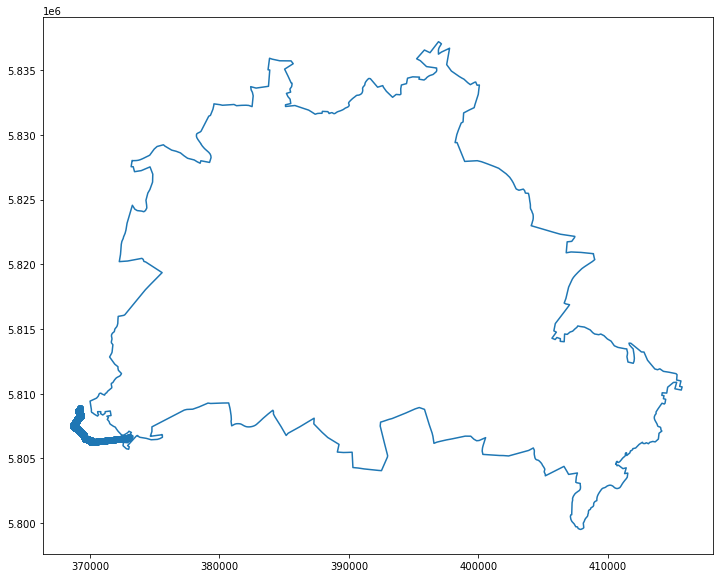

In [38]:
fig,ax = plt.subplots(figsize=(12,12))
gdf_bound.exterior.plot(ax=ax)
gdf.loc[gdf.TripID=='ae77cdf71c348211b58fbc424b51e7b3'].plot(ax=ax)

In [41]:
gdf.loc[gdf.TripID=='ae77cdf71c348211b58fbc424b51e7b3'].RawSpeed.mean()

9.161363636363637

# Calculate average statistics

What statistics are we interested in?    
   
- average speed
- average acceleration
- distance
- min speed trip
- max speed trip
- min acceleration trip
- max acceleration trip
- no of measuerment points per trips

In [197]:
# function to calculate mean speed of trip based on measured raw speed
def get_v_mean_measured(df):
    return df.groupby(df.TripID).RawSpeed.mean()

In [ ]:
# count number of measurements for trip
def get_num_count(df):
    return df.groupby(df.TripID).size()

In [ ]:
# get tdf_stats with waiting times and jump lengths
def get_stats(tdf):
    tdf_stats = individual.waiting_times(tdf)
    tdf_stats['jump_lenghts']=individual.jump_lengths(tdf)*1e3
    return tdf

In [ ]:
# function to calculate average velocities for every time step
def get_v_points(tdf_stats):
    # input is tdf_stats, returns tdf series in [m/s]
    return (tdf_stats.jump_lenghts/tdf_stats.waiting_times)

In [ ]:
# function calculates average velocities [m/s] 
def get_v_mean(tdf_stats):
    # input is tdf_stats, returns tdf series in [m/s]
    tdf_stats['velocities'] = tdf_stats.jump_lenghts/tdf_stats.waiting_times
    return np.mean(tdf_stats.velocities[0])

In [ ]:
def get_a_points(tdf_stats):
    # input is tdf_stats, returns tdf series in [m/s]
    return (tdf_stats.velocities[0][1:]-tdf_stats.velocities[0][:-1])/tdf_stats.waiting_times[0][:-1]

In [51]:
# Analysis of speed values
# --> 4607 of 14719 do not have a speed value
df_av_speed.isna().value_counts()

False    10112
True      4607
Name: RawSpeed, dtype: int64

# Test out scikit mobility library 

- compression of points becomes possible
- detection of stops (which defines trips)

In [93]:
# trjectory dataframes
tdf = skm.TrajDataFrame(df, 
                          latitude='lat', longitude='lon', 
                          datetime='CaptureDate')

In [97]:
tdf.crs

{'init': 'epsg:4326'}

In [113]:
# take the points of a single user
user0_tdf = tdf[tdf.TripID == 'ae77cdf71c348211b58fbc424b51e7b3']
#user0_tdf_sample = user0_tdf[0:300]
user0_tdf_sample = user0_tdf.iloc[::10,:]

In [118]:
# plot stops
user0_map = user0_tdf_sample.plot_stops()
# plot the trajectory of the user
user0_tdf_sample.plot_trajectory(map_f=user0_map)

/opt/anaconda3/envs/urban_form_local/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:646: UserWarning: Only the stops of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  return plot.plot_stops(self, map_f=map_f, max_users=max_users, tiles=tiles, zoom=zoom,
/opt/anaconda3/envs/urban_form_local/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,
/opt/anaconda3/envs/urban_form_local/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`

In [119]:
# point compression
from skmob.preprocessing import compression

In [128]:
# compression of points within a 50m radius reduces the sample size from 3.4k to only 122!

user0_tdf_comp = compression.compress(user0_tdf, spatial_radius_km=0.05)
len(user0_tdf_comp)

122

In [135]:
from skmob.measures import individual

In [182]:
user0_tdf.head()

,Unnamed: 0,Unnamed: 0.1,TripID,WaypointSequence,datetime,lat,lng,SegmentID,ZoneName,Frc,DeviceID,RawSpeed,RawSpeedMetric,lon_proj,lat_proj,OSM_edge_1,OSM_edge_2,geometry
37954,37954,6058214,ae77cdf71c348211b58fbc424b51e7b3,468,2017-07-09 16:56:28+00:00,52.39520,13.13415,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,70.0,kph,373045.129757,5.806633e+06,30570808,30570816,POINT (13.13415 52.39520)
37955,37955,6058215,ae77cdf71c348211b58fbc424b51e7b3,469,2017-07-09 16:56:29+00:00,52.39514,13.13386,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,69.0,kph,373025.227310,5.806627e+06,30570808,30570816,POINT (13.13386 52.39514)
37956,37956,6058216,ae77cdf71c348211b58fbc424b51e7b3,470,2017-07-09 16:56:30+00:00,52.39510,13.13357,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,69.0,kph,373005.382234,5.806623e+06,30570808,30570816,POINT (13.13357 52.39510)
37957,37957,6058217,ae77cdf71c348211b58fbc424b51e7b3,471,2017-07-09 16:56:31+00:00,52.39505,13.13329,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,70.0,kph,372986.188761,5.806618e+06,30570808,30570816,POINT (13.13329 52.39505)
37958,37958,6058218,ae77cdf71c348211b58fbc424b51e7b3,472,2017-07-09 16:56:32+00:00,52.39502,13.13303,NaN,NaN,NaN,ddbb2e139d7288624cf4ab06d91ff3ad,68.0,kph,372968.413396,5.806615e+06,30570808,30570816,POINT (13.13303 52.39502)


In [170]:
def calc_v_mean(tdf):
    # function calculates average velocities for each point
    tdf_stats = individual.waiting_times(tdf)
    tdf_stats['jump_lenghts']=individual.jump_lengths(tdf)*1e3
    tdf_stats['velocities'] = tdf_stats.jump_lenghts/tdf_stats.waiting_times
    return np.mean(tdf_stats.velocities[0])*3.6

In [171]:
calc_v_mean(user0_tdf) 

8.198258256120752

In [179]:
tdf_stats = individual.waiting_times(user0_tdf)

In [180]:
tdf_stats['jump_lenghts']=individual.jump_lengths(user0_tdf)*1e3
tdf_stats

,waiting_times,jump_lenghts
0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[20.777497431837265, 20.173662371968966, 19.79..."


In [215]:
tdf_stats['velocities'] = (tdf_stats.jump_lenghts/tdf_stats.waiting_times)
tdf_stats

,waiting_times,jump_lenghts,velocities
0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[20.777497431837265, 20.173662371968966, 19.79...","[20.777497431837265, 20.173662371968966, 19.79..."


In [198]:
# lets check if the jump lenght is the distance we also calculate with geopandas
gdf_test = gdf.loc[gdf.TripID=='ae77cdf71c348211b58fbc424b51e7b3']
gdf_test.iloc[[1]].geometry.reset_index(drop=True).distance(gdf_test.iloc[[2]].geometry.reset_index(drop=True))

0    20.232276
dtype: float64

In [216]:
## lets calculate acceleration per point and on average
(tdf_stats.velocities[0][1:]-tdf_stats.velocities[0][:-1])/tdf_stats.waiting_times[0][:-1]

array([-0.60383506, -0.37814143, -1.841208  , ..., -0.85096844,
       -0.45150136,  9.02151844])

array([20.77749743, 20.17366237, 19.79552094, ...,  2.60493919,
        1.75397075,  1.30246939])

# Plots of stats

<AxesSubplot:ylabel='Frequency'>

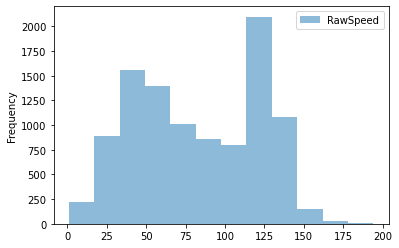

In [79]:
# average speed
df_av_speed.plot.hist(bins=12, alpha=0.5)

# test function

In [5]:
tdf_trips = skm.TrajDataFrame(df, 
                          latitude='lat', longitude='lon', 
                          datetime='CaptureDate')


,Unnamed: 0,Unnamed: 0.1,TripID,WaypointSequence,datetime,lat,lng,SegmentID,ZoneName,Frc,DeviceID,RawSpeed,RawSpeedMetric,lon_proj,lat_proj,OSM_edge_1,OSM_edge_2
0,0,939,0864364a093e5c9d8b534bc3da3c1f58,0,2017-03-27 18:09:15.253000+00:00,52.351000,13.099400,NaN,NaN,NaN,84bf44fb441a49031f0ab0ffa4de5f64,NaN,kph,370551.720553,5.801779e+06,232588936,232588923
1,1,940,0864364a093e5c9d8b534bc3da3c1f58,1,2017-03-27 18:12:17.427000+00:00,52.355463,13.117613,NaN,NaN,NaN,84bf44fb441a49031f0ab0ffa4de5f64,NaN,kph,371805.019294,5.802243e+06,241639517,241642425
2,2,1092,0a95ff01129a456b19620b75e5329d6b,42,2017-03-27 16:02:37+00:00,52.325111,13.103566,NaN,NaN,NaN,264052c66423c0367645d09c35c91710,127.0,kph,370759.967762,5.798892e+06,275243986,290706780
3,3,1093,0a95ff01129a456b19620b75e5329d6b,43,2017-03-27 16:03:07+00:00,52.331043,13.114602,NaN,NaN,NaN,264052c66423c0367645d09c35c91710,125.0,kph,371529.180570,5.799532e+06,31450590,268017004
4,4,1094,0a95ff01129a456b19620b75e5329d6b,44,2017-03-27 16:03:37+00:00,52.334881,13.128057,NaN,NaN,NaN,264052c66423c0367645d09c35c91710,123.0,kph,372456.963044,5.799935e+06,6978263531,268017289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,14196915,2ab7034a9bdc52e9155dd4f930d4263d,14,2017-02-17 11:50:39+00:00,52.464570,13.129810,NaN,NaN,NaN,cda7cbbab5ee5fac3e40851821a2d08b,31.0,kph,372949.527918,5.814356e+06,278025029,278030290
99996,99996,14196916,2ab7034a9bdc52e9155dd4f930d4263d,15,2017-02-17 11:50:54+00:00,52.465710,13.128900,NaN,NaN,NaN,cda7cbbab5ee5fac3e40851821a2d08b,40.0,kph,372890.997628,5.814484e+06,27324719,27324721
99997,99997,14196917,2ab7034a9bdc52e9155dd4f930d4263d,16,2017-02-17 11:51:09+00:00,52.467250,13.127240,NaN,NaN,NaN,cda7cbbab5ee5fac3e40851821a2d08b,52.0,kph,372782.680502,5.814658e+06,27324721,27324719
99998,99998,14196918,2ab7034a9bdc52e9155dd4f930d4263d,17,2017-02-17 11:51:24+00:00,52.468000,13.127000,NaN,NaN,NaN,cda7cbbab5ee5fac3e40851821a2d08b,33.0,kph,372768.541812,5.814742e+06,27324721,29846642


In [34]:
df_out = pd.DataFrame()

In [20]:
def get_v_mean_measured(df):
    return df.groupby(df.TripID).RawSpeed.mean()

In [35]:
df_out['mean_speed'] = get_v_mean_measured(tdf_trips)
df_out = df_out.reset_index()
df_out

,TripID,mean_speed
0,00028a1791885f76e27b8ef29fe95060,138.250000
1,0006daf6d4d88d76f14f59376aa8a22d,NaN
2,0007bf45e76c809fe776136febd8edd0,120.000000
3,00085fda345ba055c47cf38e68bc2db2,52.333333
4,000f61c562fb307000ba4d6269ae8458,NaN
...,...,...
14714,fff1138b505d574bfcc6d2a38cb55ab0,86.000000
14715,fff52147e304326232204b4353eb6053,NaN
14716,fff74baaeb579c40dd348dff6fbfd7ee,12.500000
14717,fffb2f6463c2dac68baa9bff017c668a,119.000000


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [46]:
from skmob.measures import individual

individual.waiting_times(tdf_trips).to_json('out.json')

In [49]:
tdf_trips.groupby('TripID').individual.waiting_times()

AttributeError: 'DataFrameGroupBy' object has no attribute 'individual'

In [85]:
tdf_sample = tdf_trips.sample(n=1000)
tdf_sample['TripID'].value_counts()

ae77cdf71c348211b58fbc424b51e7b3    28
1e0485953c276ebbfeba93a7c9a02675     7
c7807601ca635e1f429d49731e8faa63     6
27218f77835c0f4f3bb3656207e39a77     6
d6d48a0137fb701e0b3145add46da9ef     5
                                    ..
49892c2a98b2cef7d38ca1ba370497e3     1
858d4cf110bd827c7339221996b51072     1
7ed34442acb2c9c8921ecb590575706b     1
537364919110c8ad03e437556fd8fd57     1
2ab72582fa17fd2a7eac45cd042c395a     1
Name: TripID, Length: 761, dtype: int64

In [96]:
g = tdf_sample.groupby("TripID")

In [132]:
dict_wt = {'ids':[],'waiting_times':[],'jump_lengths':[]}
for id, group in g:
    dict_wt['ids'].append(id)
    dict_wt['waiting_times'].append(individual.waiting_times(group).waiting_times[0])

In [141]:
df1 = pd.DataFrame(dict_wt)

In [140]:
dict_jl = {'ids':[],'jump_lenghts':[]}
for id, group in g:
    dict_jl['ids'].append(id)
    dict_jl['jump_lenghts'].append(individual.jump_lengths(group).jump_lengths[0])

In [142]:
df2 = pd.DataFrame(dict_jl)
df2

,ids,jump_lenghts
0,015079afbef2869403809f17afbc890b,[]
1,01d9b7e783d1f4af2d46271adffdceef,"[1.0157773874725597, 0.4151197883442249]"
2,01eb04decf04ad0eb0e96aea728edcbd,[]
3,02456a49318a1e25d9cfdd6e9c45550e,[]
4,0260d1268839765fee79c96337528819,[]
...,...,...
756,fe87c3fcc331b9b170475686ede62e3a,[4.08815706817395]
757,feaa38a401a30e69cde1f7d2ad0eb6fd,[]
758,ff1ae8a35aa556cd1b6610fb3670addf,[]
759,ffc6c4e8cec31c701674caf6f0fec14d,[]


In [144]:
df1.merge(df2, on ='ids')

,ids,waiting_times,jump_lenghts
0,015079afbef2869403809f17afbc890b,[],[]
1,01d9b7e783d1f4af2d46271adffdceef,"[820.0, 200.0]","[1.0157773874725597, 0.4151197883442249]"
2,01eb04decf04ad0eb0e96aea728edcbd,[],[]
3,02456a49318a1e25d9cfdd6e9c45550e,[],[]
4,0260d1268839765fee79c96337528819,[],[]
...,...,...,...
756,fe87c3fcc331b9b170475686ede62e3a,[395.0],[4.08815706817395]
757,feaa38a401a30e69cde1f7d2ad0eb6fd,[],[]
758,ff1ae8a35aa556cd1b6610fb3670addf,[],[]
759,ffc6c4e8cec31c701674caf6f0fec14d,[],[]


In [161]:
l = []
for idx,gr in g:
    print(gr.RawSpeed)


43555    59.0
Name: RawSpeed, dtype: float64
99821     NaN
99861    22.0
99663     NaN
Name: RawSpeed, dtype: float64
92913    85.0
Name: RawSpeed, dtype: float64
90604    62.0
Name: RawSpeed, dtype: float64
18124    104.0
Name: RawSpeed, dtype: float64
81600    37.0
81555    21.0
Name: RawSpeed, dtype: float64
19583    86.0
Name: RawSpeed, dtype: float64
2266   NaN
Name: RawSpeed, dtype: float64
84412   NaN
Name: RawSpeed, dtype: float64
98883    67.0
Name: RawSpeed, dtype: float64
91302    31.0
Name: RawSpeed, dtype: float64
58252    15.0
58148     NaN
Name: RawSpeed, dtype: float64
9601    85.0
Name: RawSpeed, dtype: float64
31680    NaN
71222    3.0
31697    4.0
71216    3.0
71188    3.0
Name: RawSpeed, dtype: float64
93815    60.0
Name: RawSpeed, dtype: float64
51546    1.0
Name: RawSpeed, dtype: float64
82704   NaN
Name: RawSpeed, dtype: float64
56062    27.0
Name: RawSpeed, dtype: float64
66751    1.0
Name: RawSpeed, dtype: float64
47122    46.0
47095    80.0
Name: RawSpeed, dty

In [147]:
g.RawSpeed.mean()

TripID
015079afbef2869403809f17afbc890b     59.0
01d9b7e783d1f4af2d46271adffdceef     22.0
01eb04decf04ad0eb0e96aea728edcbd     85.0
02456a49318a1e25d9cfdd6e9c45550e     62.0
0260d1268839765fee79c96337528819    104.0
                                    ...  
fe87c3fcc331b9b170475686ede62e3a     61.0
feaa38a401a30e69cde1f7d2ad0eb6fd      NaN
ff1ae8a35aa556cd1b6610fb3670addf     46.0
ffc6c4e8cec31c701674caf6f0fec14d     78.0
ffee1faec4bb2fb0f47c4b67abfcdf21    101.0
Name: RawSpeed, Length: 761, dtype: float64

In [149]:

# define class for cleaning
class Waypoint_Stats():

    def __init__(self):
        # tdf
        self.tdf = None
        self.grouped = None
        # variables
        self.n_points = None
        self.l_trip = None
        self.t_trip = None
        self.points_per_s = None
        self.points_per_t = None
        self.v_mean_trip = None
        self.v_max_trip = None
        self.v_min_trip = None
        self.a_mean_trip = None
        self.a_max_trip = None
        self.a_min_trip = None
        # output
        self.out = None
    
    def load_data(self, path,sample=True):
        """
        loads waypoint csv
        """
        
        # load csv
        if sample: 
            chunks = pd.read_csv(path, chunksize=1e4)
            for idx,df in enumerate(chunks):
                if idx==0: break
        else: df = pd.read_csv(path)
        
        # load as trjaectory dataframe
        self.tdf = skm.TrajDataFrame(df, 
                          latitude='lat', longitude='lon', 
                          datetime='CaptureDate')
        
        # load it also as a grouped object
        self.grouped = self.tdf.groupby("TripID")





    def get_num_count(self):
        # count number of measurements for trip
        return self.grouped.size()


        
    def get_v_mean_raw(self):
        # calculate mean speed of trip based on measured raw speed
        return self.tdf.groupby(self.tdf.TripID).RawSpeed.mean()

    """
    # get tdf_stats with waiting times and jump lengths
    def get_stats(tdf):
        tdf_stats = individual.waiting_times(tdf)
        tdf_stats['jump_lenghts']=individual.jump_lengths(tdf)*1e3
        return tdf


    # function to calculate average velocities for every time step
    def get_v_points(tdf_stats):
        # input is tdf_stats, returns tdf series in [m/s]
        return (tdf_stats.jump_lenghts/tdf_stats.waiting_times)

    # function calculates average velocities [m/s] 
    def get_v_mean(tdf_stats):
        # input is tdf_stats, returns tdf series in [m/s]
        tdf_stats['velocities'] = tdf_stats.jump_lenghts/tdf_stats.waiting_times
        return np.mean(tdf_stats.velocities[0])

    def get_a_points(tdf_stats):
        # input is tdf_stats, returns tdf series in [m/s]
        return (tdf_stats.velocities[0][1:]-tdf_stats.velocities[0][:-1])/tdf_stats.waiting_times[0][:-1]
    """



# define input paths and read in data
path_waypoints = '/Users/Felix/Documents/Studium/PhD/05_Projects/03_Understand_Urban_Form_on_Mobility/03_Program/data/tripdata/waypoints/waypoints_100k.csv'

stats = Waypoint_Stats()
# load data
stats.load_data(path_waypoints,sample=True)

# intialise dict with stats
dict_stats = {'ids':[],
                'waiting_times':[],
                'jump_lengths':[],
                'n_points':[]}


for id, group in stats.grouped:
    dict_stats['ids'].append(id)
    dict_stats['waiting_times'].append(individual.waiting_times(group).waiting_times[0])
    dict_stats['jump_lengths'].append(individual.jump_lengths(group).jump_lengths[0])

    dict_stats['n_points'].append(group.size)
    #dict_stats['v_mean_raw'].append(group.RawSpeed.mean())

#with open('mycsvfile.csv', 'w') as f:  # You will need 'wb' mode in Python 2.x
#    w = csv.DictWriter(f, dict_stats.keys())
#    w.writeheader()
#    w.writerow(dict_stats)

print('saving to .csv')
#stats.out=pd.DataFrame(dict_stats)
#stats.out.to_csv('test.csv',index=False)





saving to .csv


In [150]:
stats.out=pd.DataFrame(dict_stats)

In [151]:
stats.out

,ids,waiting_times,jump_lengths,n_points
0,00028a1791885f76e27b8ef29fe95060,"[15.0, 15.0, 15.0]","[0.5666027739132034, 0.5764937225870562, 0.575...",68
1,004e3146c4d3d9ca9cadd8332a8e400d,"[15.0, 15.0, 15.0, 15.0]","[0.4508630451514779, 0.4742700617837228, 0.463...",85
2,004ef78311c5cb66a29eba9a80a76553,[],[],17
3,006db0df3c3454196523608503422291,[],[],17
4,007f32efa6ebe8cf468e9de80758cd86,[],[],17
...,...,...,...,...
3134,ff913a2d6090742b255ea913c89636f5,"[15.0, 15.0, 15.0, 15.0]","[0.5358168510898582, 0.528514990139056, 0.5433...",85
3135,ff9c428811ae2d061110dd72d7bae48f,[],[],17
3136,ff9c80c89700d8f286dfd1ee9114eb2d,[],[],17
3137,ffdd16cb7b8ae415eb6093ba7d3e3d6d,[],[],17


In [154]:
len(set(stats.out.ids))

3139

In [1]:
l1 = []
l2 = []
l1/l2

TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [5]:
import pandas as pd
data = {'wt':([1,1],[]),'jl':([1,2],[])}
df = pd.DataFrame(data)
df

,wt,jl
0,"[1, 1]","[1, 2]"
1,[],[]


In [12]:
if len(l1)==0:
    print('hi')

hi


In [15]:
sample_size = None
if sample_size:
    print('hi')